# Part 1: k-Nearest Neighbors and the Curse of Dimensionality

## Step 1: Load and Prepare the Data

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load digits dataset
digits = load_digits()
X, y = digits.data, digits.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Original feature dimension: {X_train.shape[1]}")

Original feature dimension: 64


## Step 2: kNN on Low-Dimensional Data (64 Dimensions)

In [71]:
knn_low = KNeighborsClassifier(n_neighbors=5)

# 初始
knn_low.fit(X_train, y_train)

# Predict evaluate
y_pre = knn_low.predict(X_test)
accuracy = accuracy_score(y_test, y_pre)

print(f"Accuracy original (64D) data: {accuracy:.4f}")

Accuracy original (64D) data: 0.9926


## Step 3: Adding Noisy Features to Create a High-Dimensional Dataset

In [72]:
# Define the number of noise features to add
n_noise_features = 10000

# Generate random noise for the training set
# Note: using seed for reproducibility is good practice, though not strictly required by your prompt's code
np.random.seed(42) 
noise_train = 10 * np.random.rand(X_train.shape[0], n_noise_features)
# Concatenate the original features with the noise
X_train_high_dim = np.concatenate([X_train, noise_train], axis=1)

# Generate random noise for the test set
noise_test = 10 * np.random.rand(X_test.shape[0], n_noise_features)
# Concatenate the original features with the noise
X_test_high_dim = np.concatenate([X_test, noise_test], axis=1)

print(f"New high-dimensional feature space: {X_train_high_dim.shape[1]}")

New high-dimensional feature space: 10064


## Step 4: kNN on High-Dimensional Data (10064 Dimensions)

In [73]:
knn_high = KNeighborsClassifier(n_neighbors=5)

# noise data
knn_high.fit(X_train_high_dim, y_train)

# Predict/evaluate 
y_pred_high = knn_high.predict(X_test_high_dim)
accuracy_high = accuracy_score(y_test, y_pred_high)

print(f"Accuracy high-dimensional (10064D) data: {accuracy_high:.4f}")

Accuracy high-dimensional (10064D) data: 0.5278


# Part 2: Random Forest - Variance Reduction and Feature Importance

## Step 1: Load and Prepare the Data

In [74]:
# Part 2: Random Forest - Variance Reduction and Feature Importance

# Step 1: Load and Prepare the Data
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier

# Load breast cancer dataset
cancer = load_breast_cancer()
X_cancer, y_cancer = cancer.data, cancer.target
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(
    X_cancer, y_cancer, random_state=42)

## Step 2: Analyze the Effect of the Number of Trees

n_estimators: 5, OOB Error: 0.1244


/Users/jrx/opt/anaconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/jrx/opt/anaconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/jrx/opt/anaconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/jrx/opt/anaconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/jrx/opt/anaconda3/envs/ml_env/lib/python3

n_estimators: 10, OOB Error: 0.0634


/Users/jrx/opt/anaconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/jrx/opt/anaconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


n_estimators: 15, OOB Error: 0.0469
n_estimators: 20, OOB Error: 0.0376
n_estimators: 25, OOB Error: 0.0376
n_estimators: 30, OOB Error: 0.0423
n_estimators: 40, OOB Error: 0.0352
n_estimators: 50, OOB Error: 0.0446
n_estimators: 60, OOB Error: 0.0376
n_estimators: 70, OOB Error: 0.0376
n_estimators: 80, OOB Error: 0.0352
n_estimators: 90, OOB Error: 0.0376
n_estimators: 100, OOB Error: 0.0399


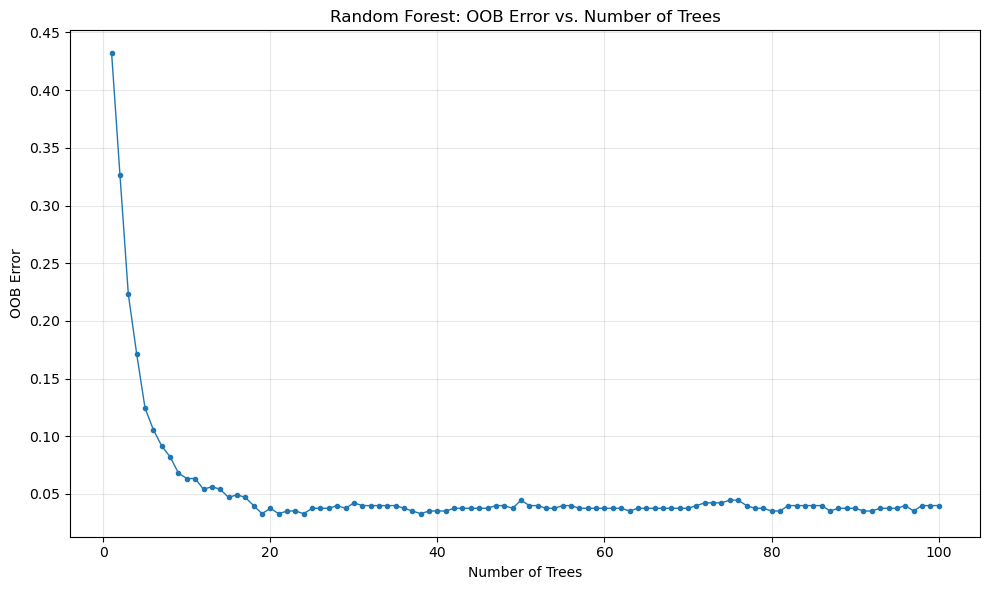

In [75]:
# 1 Create a range of n_estimators values (from 1 to 100)
n_estimators_range = range(1, 101)
oob_errors = []

# 2 Loop through the range of estimators
for n_est in n_estimators_range:
    # Initialize RandomForestClassifier with current number of estimators and oob_score=True
    rf_model = RandomForestClassifier(n_estimators=n_est, oob_score=True, random_state=42)
    # Fit the model on the training data
    rf_model.fit(X_train_cancer, y_train_cancer)
    # Calculate OOB error (1 - model.oob_score_)
    oob_error = 1 - rf_model.oob_score_
    oob_errors.append(oob_error)
    if n_est >= 0 and n_est <= 30:
        if n_est % 5 == 0:
            print(f"n_estimators: {n_est}, OOB Error: {oob_error:.4f}")
    elif n_est > 30:
        if n_est % 10 == 0:
            print(f"n_estimators: {n_est}, OOB Error: {oob_error:.4f}")
        


# 3 Plot the OOB error vs. the number of trees
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, oob_errors, marker='o', linewidth=1, markersize=3)
plt.xlabel('Number of Trees')
plt.ylabel('OOB Error')
plt.title('Random Forest: OOB Error vs. Number of Trees')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Step 3: Identify Feature Importance

In [76]:
import pandas as pd
# 1 Train a final RandomForestClassifier with n_estimators=100
final_rf = RandomForestClassifier(n_estimators=100, random_state=42)
final_rf.fit(X_train_cancer, y_train_cancer)

# 2 Get the feature importances from model.feature_importances_
feature_importance = final_rf.feature_importances_
feature_name = cancer.feature_names

# Create a DataFrame for easier handling
feature_importance_df = pd.DataFrame({
    'feature': feature_name,
    'importance': feature_importance
})

top_10_feature = feature_importance_df.sort_values('importance', ascending=False).head(10)

print("Top 10 Most Important Features:")
print(top_10_feature.to_string(index=False))

Top 10 Most Important Features:
             feature  importance
worst concave points    0.172295
          worst area    0.123192
 mean concave points    0.090299
      mean concavity    0.083215
        worst radius    0.081277
     worst perimeter    0.071388
      mean perimeter    0.053146
          area error    0.043551
           mean area    0.042780
         mean radius    0.039711


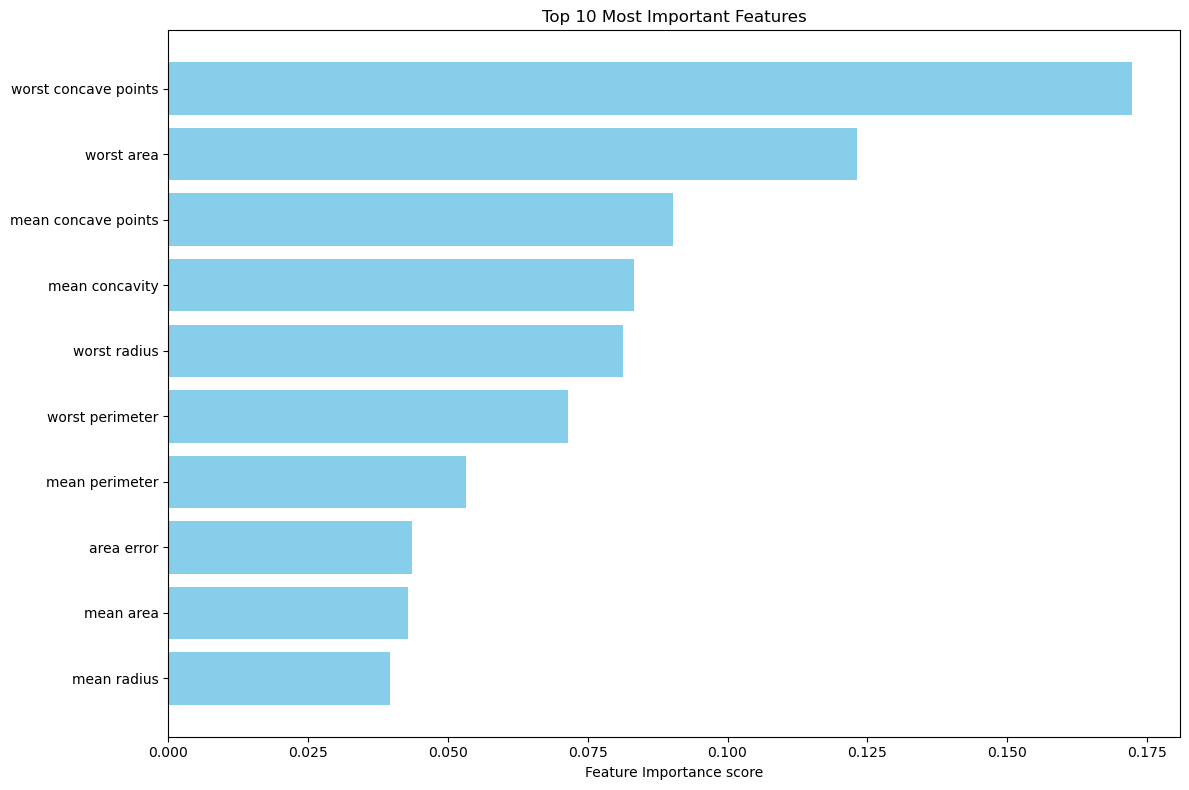

In [77]:
# 3 Create a bar plot to visualize the importances of top 10 features
plt.figure(figsize=(12, 8))
bars = plt.barh(top_10_feature['feature'], top_10_feature['importance'], color='skyblue')
plt.xlabel('Feature Importance score')
plt.title('Top 10 Most Important Features')
plt.gca().invert_yaxis()  


plt.tight_layout()
plt.show()

# Part 3: Visualizing the AdaBoost Re-weighting Process

## Step 1: Load and Prepare the Data

In [78]:
from sklearn.datasets import load_iris

# Load iris dataset and select two classes
iris = load_iris()
X = iris.data[:, [0, 2]]  # Sepal Length and Petal Length
y = iris.target
X_ab, y_ab = X[y != 0], y[y != 0]
y_ab[y_ab == 1] = -1  # Versicolor
y_ab[y_ab == 2] = 1   # Virginica

#data belike
print(f"Data shape: {X_ab.shape}")
print(f"Class distribution: {np.unique(y_ab, return_counts=True)}")

Data shape: (100, 2)
Class distribution: (array([-1,  1]), array([50, 50]))


## Step 2: Implement the AdaBoost Iterations

In [79]:
# Initialize weights
n_samples = X_ab.shape[0]
sample_weights = np.full(n_samples, (1 / n_samples))


def plot_adaboost(X, y, sample_weights, stump, title, iteration):
    plt.figure(figsize=(10, 8))
    
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, 
                         s=sample_weights * 5000, alpha=0.7, edgecolors='black')
    
    # mesh
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    # about plot decision boundary
    Z = stump.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    
    plt.xlabel('Sepal Length')
    plt.ylabel('Petal Length')
    plt.title(f'{title} - Iteration {iteration}')
    # plt.colorbar(scatter)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

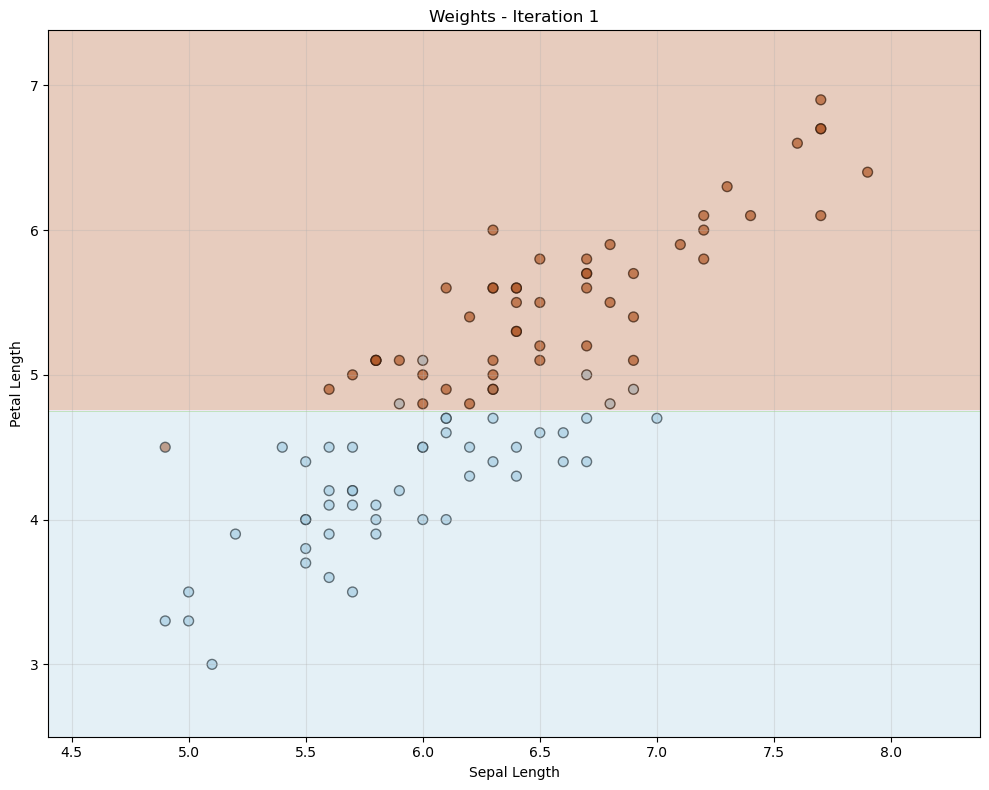

Iteration 1: Error: 0.0700, Alpha: 1.2933
Updated weights: Min: 0.0084, Max: 0.0308, Sum: 1.0000


In [80]:
from sklearn.tree import DecisionTreeClassifier

# --- Iteration 1 ---

# 1. Train a decision stump on X_ab, y_ab with 'sample_weight = sample_weights'
stump1 = DecisionTreeClassifier(max_depth=1, random_state=42)
stump1.fit(X_ab, y_ab, sample_weight=sample_weights)

# 2. Plot the data points and the decision boundary from stump1
plot_adaboost(X_ab, y_ab, sample_weights, stump1, "Weights", 1)

# 3. Calculate the weighted error 'error1' and the classifier weight 'alpha1'
predictions_1 = stump1.predict(X_ab)
misclassified_1 = (predictions_1 != y_ab)
error_1 = np.sum(sample_weights[misclassified_1])
alpha_1 = 0.5 * np.log((1 - error_1) / error_1)

print(f"Iteration 1: Error: {error_1:.4f}, Alpha: {alpha_1:.4f}")

# 4. Update the sample_weights. Increase the weights for misclassified points.
sample_weights_new = sample_weights * np.exp(alpha_1 * misclassified_1 * 1)

# 5. Normalize the new sample_weights so they sum to 1
sample_weights = sample_weights_new / np.sum(sample_weights_new)

print(f"Updated weights: Min: {sample_weights.min():.4f}, Max: {sample_weights.max():.4f}, Sum: {sample_weights.sum():.4f}")

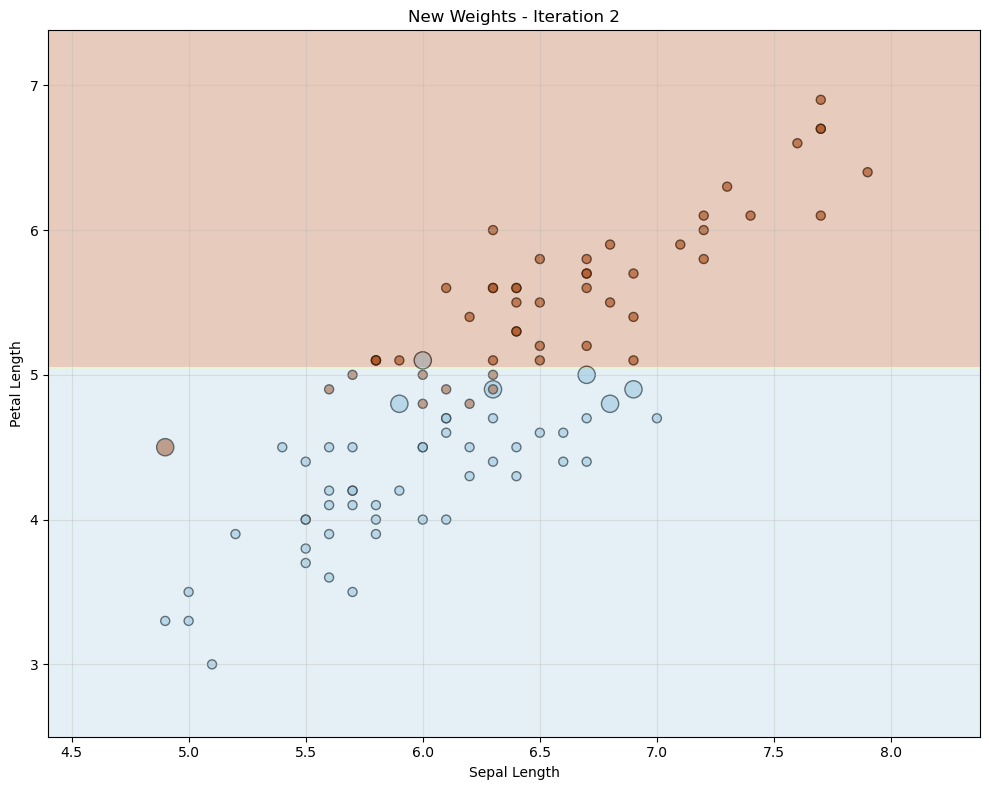

Iteration 2: Error: 0.1290, Alpha: 0.9549
Points misclassified in iteration 1: 7
Points misclassified in iteration 2: 10


In [81]:
# --- Iteration 2 ---

# 6. Train a new stump 'stump2' on X_ab, y_ab with the *new* sample_weights
stump2 = DecisionTreeClassifier(max_depth=1, random_state=42)
stump2.fit(X_ab, y_ab, sample_weight=sample_weights)

# 7. Plot the data points again, this time with the updated weights as their size
plot_adaboost(X_ab, y_ab, sample_weights, stump2, "New Weights", 2)

# 8. Calculate metrics for iteration 2
prediction_2 = stump2.predict(X_ab)
misclassified_2 = (prediction_2 != y_ab)
error_2 = np.sum(sample_weights[misclassified_2])
alpha_2 = 0.5 * np.log((1 - error_2) / error_2)

print(f"Iteration 2: Error: {error_2:.4f}, Alpha: {alpha_2:.4f}")

print(f"Points misclassified in iteration 1: {np.sum(misclassified_1)}")
print(f"Points misclassified in iteration 2: {np.sum(misclassified_2)}")

In [82]:
# analysis 
#  weight change between 1 and 2
initial_avg_weight = 1 / n_samples
max_weight_after_iter_1 = sample_weights.max()
min_weight_after_iter_1 = sample_weights.min()

print(f"Initial Average weight: {initial_avg_weight:.4f}")
print(f"After iteration 1: max weight: {max_weight_after_iter_1:.4f}, min weight: {min_weight_after_iter_1:.4f}")
print(f"Weight ratio: {max_weight_after_iter_1 / min_weight_after_iter_1:.2f}")

if hasattr(stump1, 'tree_') and hasattr(stump2, 'tree_'):
    print("\nDecision Boundary comparison:")
    print(f"Stump 1 use feature {stump1.tree_.feature[0]} with threshold {stump1.tree_.threshold[0]:.2f}")
    print(f"Stump 2 use feature {stump2.tree_.feature[0]} with threshold {stump2.tree_.threshold[0]:.2f}")

Initial Average weight: 0.0100
After iteration 1: max weight: 0.0308, min weight: 0.0084
Weight ratio: 3.64

Decision Boundary comparison:
Stump 1 use feature 1 with threshold 4.75
Stump 2 use feature 1 with threshold 5.05


## Part 4: Gradient Boosting with XGBoost

## Step 1: Install XGBoost

## Step 2: Train and Evaluate an XGBoost Classifier

In [83]:
import xgboost as xgb
from sklearn.metrics import classification_report

# Initialize the XGBoost classifier
# 'objective': 'binary:logistic' is used for binary classification
# 'eval_metric': 'logloss' is the loss function
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)

# Train the model
xgb_model.fit(X_train_cancer, y_train_cancer)

# Make predictions and evaluate
y_pred_xgb = xgb_model.predict(X_test_cancer)
print("--- XGBoost Classification Report ---")
print(classification_report(y_test_cancer, y_pred_xgb))

--- XGBoost Classification Report ---
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        54
           1       0.97      0.97      0.97        89

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



## Step 3: Analyze XGBoost Feature Importance

In [84]:
# 1 Get the feature importances from 'xgb_model.feature_importances_'
xgb_feature_importances = xgb_model.feature_importances_
feature_name = cancer.feature_names

xgb_feature_importance_df = pd.DataFrame({
    'feature': feature_name,
    'importance': xgb_feature_importances
})

xgb_top_10_features = xgb_feature_importance_df.sort_values('importance', ascending=False).head(10)

print("Top 10 Most Important Feature:")
print(xgb_top_10_features.to_string(index=False))

Top 10 Most Important Feature:
             feature  importance
 mean concave points    0.395381
worst concave points    0.240849
        worst radius    0.075121
     worst perimeter    0.064010
          worst area    0.029545
           mean area    0.026528
       worst texture    0.021289
     worst concavity    0.021113
     concavity error    0.018931
        mean texture    0.016834


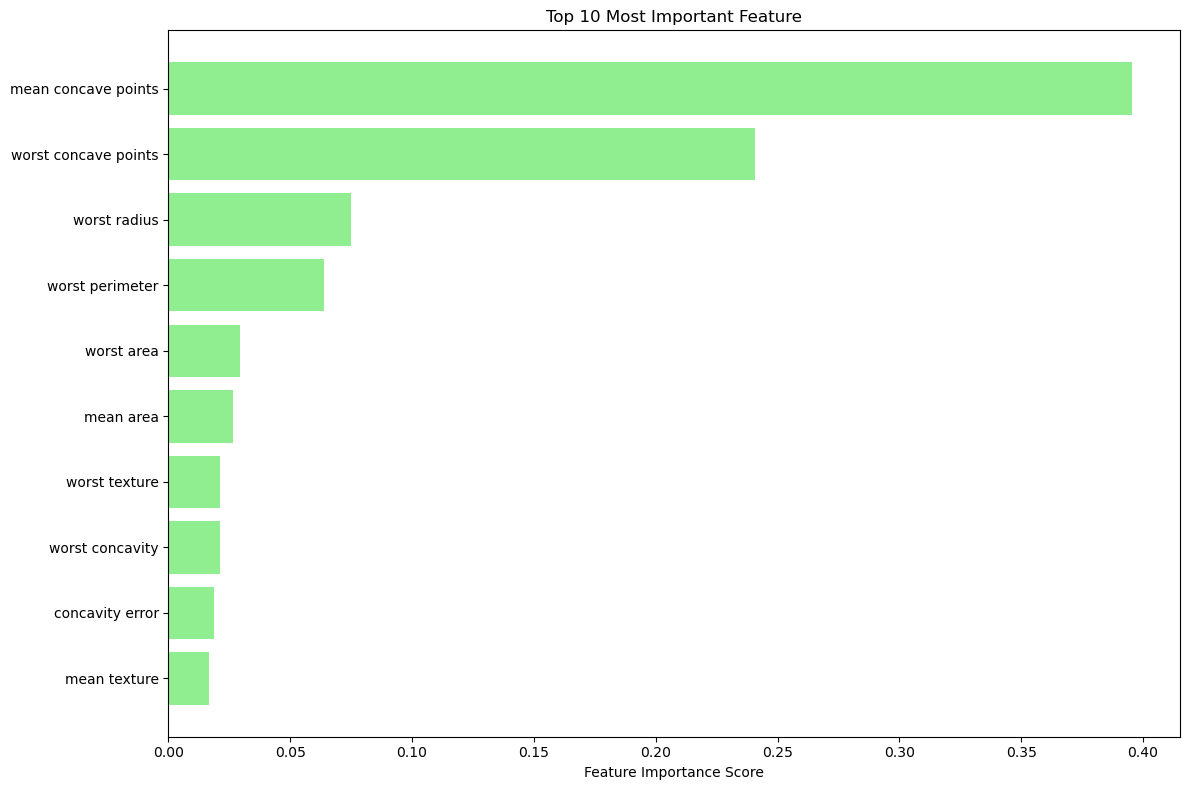

In [85]:
# 2  Create a bar plot to visualize the importances for the top 10 features
plt.figure(figsize=(12, 8))
bars = plt.barh(xgb_top_10_features['feature'], xgb_top_10_features['importance'], color='lightgreen')
plt.xlabel('Feature Importance Score')
plt.title('Top 10 Most Important Feature')
plt.gca().invert_yaxis()  

plt.tight_layout()
plt.show()

In [86]:
accuracy_xgb = accuracy_score(y_test_cancer, y_pred_xgb)
accuracy_rf = rf_model.oob_score_

print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")

if accuracy_xgb > accuracy_rf:
    print("XGBoost performed better")
elif accuracy_xgb < accuracy_rf:
    print("Random Forest performed better")

#important feature
rf_top5 = set(top_10_feature.head(5)['feature'])
xgb_top5 = set(xgb_top_10_features.head(5)['feature'])
com_feature = rf_top5.intersection(xgb_top5)

print(f"\nCommon feature numbers in top 5: {len(com_feature)}")
print(f"Common features: {com_feature}")

rf_mi = top_10_feature.iloc[0]['feature']
xgb_mi = xgb_top_10_features.iloc[0]['feature']
print(f"\nRandom Forest most important feature: {rf_mi}")
print(f"XGBoost most important feature: {xgb_mi}")

if rf_mi == xgb_mi:
    print("Both models have same most important features.")
else:
    print("Two models have different most important features.")

Random Forest Accuracy: 0.9601
XGBoost Accuracy: 0.9580
Random Forest performed better

Common feature numbers in top 5: 4
Common features: {'worst radius', 'worst concave points', 'worst area', 'mean concave points'}

Random Forest most important feature: worst concave points
XGBoost most important feature: mean concave points
Two models have different most important features.
